In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('sonar_csv.csv', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
p= df.replace({'Class':{'Rock' : 1, 'Mine' : 0}}) 

In [14]:
p

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,Rock
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,Rock
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.0187,0.0346,0.0168,0.0177,0.0393,0.163,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
205,0.0323,0.0101,0.0298,0.0564,0.076,0.0958,0.099,0.1018,0.103,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
206,0.0522,0.0437,0.018,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.016,0.0029,0.0051,0.0062,0.0089,0.014,0.0138,0.0077,0.0031,Mine
207,0.0303,0.0353,0.049,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


Epoch 1/200
4/4 [==============================] - 1s 51ms/step - loss: 0.6997 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.4667
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6882 - accuracy: 0.5500 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6805 - accuracy: 0.6333 - val_loss: 0.6865 - val_accuracy: 0.6333
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6738 - accuracy: 0.5833 - val_loss: 0.6830 - val_accuracy: 0.6333
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6676 - accuracy: 0.5917 - val_loss: 0.6805 - val_accuracy: 0.6333
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6616 - accuracy: 0.5750 - val_loss: 0.6771 - val_accuracy: 0.6333
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6528 - accuracy: 0.6583 - val_loss: 0.6739 - val_accuracy: 0.6333
Epoch 8/200
4/4 [===

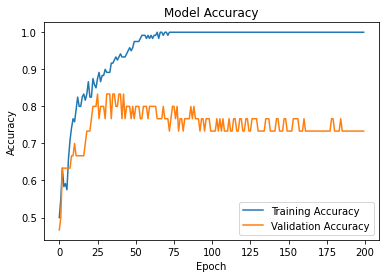

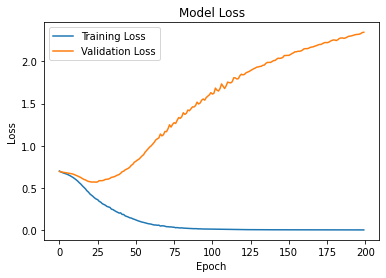

Test Loss: 0.9599
Test Accuracy: 0.7931


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Load and preprocess the SONAR dataset
sonar_df = pd.read_csv("sonar_csv.csv", header=None)
sonar_df = sonar_df.drop(0)
sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

# Define the neural network architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_y, epochs=200, validation_split=0.2, verbose=1)

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sonar_df = pd.read_csv("sonar_csv.csv", header=None)

sonar_df = sonar_df.drop(0)



sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)
sonar_df
X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)  # Convert labels to one-hot encoded format

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(train_X, train_y,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 7.3718 - accuracy: 0.5667
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 7.0743 - accuracy: 0.5600
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 6.7856 - accuracy: 0.5667
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 6.5065 - accuracy: 0.5667
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 6.2361 - accuracy: 0.5667
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 5.9730 - accuracy: 0.5667
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 5.7184 - accuracy: 0.5667
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 5.4714 - accuracy: 0.5667
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 5.2316 - accuracy: 0.5667
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 4.9993 - accuracy: 0.5667
Epoch 11/200
5/5 [===========

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5667
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5667
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5667
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5667
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5667
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5667
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5667
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5667
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5667
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5667
Epoch 11/200
5/5 [===========

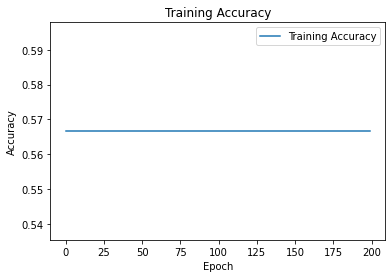

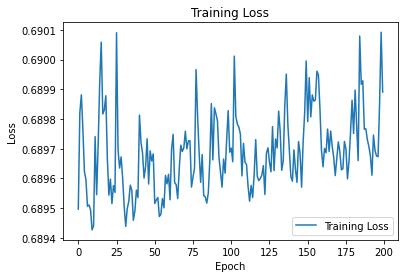

In [12]:
import matplotlib.pyplot as plt

# Train the model and obtain the history
history = model.fit(train_X, train_y, epochs=200)

# Plot the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

sonar_df = pd.read_csv("sonar_csv.csv", header=None)

sonar_df = sonar_df.drop(0)


sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)  

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, 
                    epochs=200, 
                    validation_data=(test_X, test_y),
                    callbacks=[early_stopping])

Epoch 1/200
5/5 [==============================] - 1s 36ms/step - loss: 0.6987 - accuracy: 0.5200 - val_loss: 0.6892 - val_accuracy: 0.5690
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6784 - accuracy: 0.6400 - val_loss: 0.6805 - val_accuracy: 0.6379
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6661 - accuracy: 0.6600 - val_loss: 0.6757 - val_accuracy: 0.6034
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.6570 - accuracy: 0.6600 - val_loss: 0.6705 - val_accuracy: 0.6034
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6459 - accuracy: 0.6867 - val_loss: 0.6623 - val_accuracy: 0.6207
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.6933 - val_loss: 0.6538 - val_accuracy: 0.6379
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6210 - accuracy: 0.7333 - val_loss: 0.6473 - val_accuracy: 0.7414
Epoch 8/200
5/5 [======

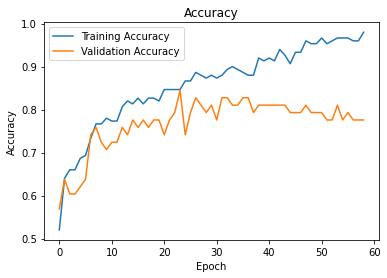

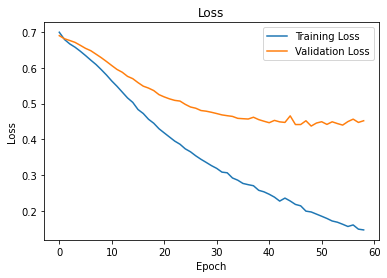

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

sonar_df = pd.read_csv("sonar_csv.csv", header=None)
sonar_df = sonar_df.drop(0)
sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

model = tf.keras.Sequential([
  tf.keras.layers.Dropout(0.2, input_shape=(60,)),  # Dropout layer as the input layer with a dropout rate of 0.2
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=200, validation_data=(test_X, test_y))



Epoch 1/200
5/5 [==============================] - 1s 37ms/step - loss: 0.7266 - accuracy: 0.5000 - val_loss: 0.6986 - val_accuracy: 0.5345
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7101 - accuracy: 0.4867 - val_loss: 0.6821 - val_accuracy: 0.5345
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6983 - accuracy: 0.5133 - val_loss: 0.6725 - val_accuracy: 0.5690
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.5600 - val_loss: 0.6655 - val_accuracy: 0.5690
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.5133 - val_loss: 0.6588 - val_accuracy: 0.5690
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6737 - accuracy: 0.5533 - val_loss: 0.6527 - val_accuracy: 0.5862
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6788 - accuracy: 0.6067 - val_loss: 0.6470 - val_accuracy: 0.5862
Epoch 8/200
5/5 [=========

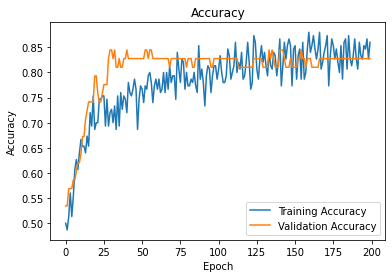

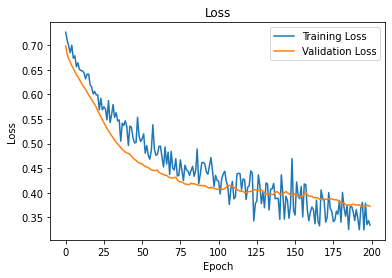

In [16]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

